In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0


In [ ]:
data.shape

(55265, 3)

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Text Preprocessing

**Step 1: Remove Punctuations**

In [ ]:
#Pre-processing done to remove punctuations
import string
string.punctuation

def removing_punctuation(text):
    ptfree="".join([i for i in text if i not in string.punctuation])
    #if the character is in string.punctuation then it won't be joined
    return ptfree

#storing the puntuation free text
data['cleaned_ques']= data['question_text'].apply(lambda x:removing_punctuation(x))

data.head()

,qid,question_text,target,cleaned_ques
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0.0,How did Quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0.0,Do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0.0,Why does velocity affect time Does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0.0,How did Otto von Guericke used the Magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0.0,Can I convert montra helicon D to a mountain b...


In [ ]:
#printing the first question text and cleaned text
print(f"Original Question: {data['question_text'][0]}")
print(f"Cleaned Question: {data['cleaned_ques'][0]}")

Original Question: How did Quebec nationalists see their province as a nation in the 1960s?
Cleaned Question: How did Quebec nationalists see their province as a nation in the 1960s


**Step 2: Lowering the text**

In [ ]:
#Pre-processing done to lower the text
data['ques_lower']= data['cleaned_ques'].apply(lambda x: x.lower())

#printing the first cleaned text and lowered text
print(f"Cleaned Question: {data['cleaned_ques'][0]}")
print(f"Lowered Question: {data['ques_lower'][0]}")

Cleaned Question: How did Quebec nationalists see their province as a nation in the 1960s
Lowered Question: how did quebec nationalists see their province as a nation in the 1960s


**Step 3: Tokenization**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
#applying function to the column
data['ques_tokenized']= data['ques_lower'].apply(lambda x: tokenization(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#printing the lowered text and tokenized question
print(f"Lowered Question: {data['ques_lower'][0]}")
print(f"Tokenized Question: {data['ques_tokenized'][0]}")

Lowered Question: how did quebec nationalists see their province as a nation in the 1960s
Tokenized Question: ['how', 'did', 'quebec', 'nationalists', 'see', 'their', 'province', 'as', 'a', 'nation', 'in', 'the', '1960s']


**Step 4: Stopwords removal**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')

#Stop words present in the library
stopwords[0:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [ ]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    #if the substring is in stopwords then it won't be joined
    return output

#applying function to the column
data['no_stopwords']= data['ques_tokenized'].apply(lambda x:remove_stopwords(x))

In [ ]:
#printing the tokenized question and question without stopwords
print(f"Tokenized Question: {data['ques_tokenized'][0]}")
print(f"Question without stopwords: {data['no_stopwords'][0]}")

Tokenized Question: ['how', 'did', 'quebec', 'nationalists', 'see', 'their', 'province', 'as', 'a', 'nation', 'in', 'the', '1960s']
Question without stopwords: ['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']


**Step 5: Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  lemm_text=" ".join(lemm_text)
  return lemm_text

data['ques_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#printing the question without stopwords and Lemmatized text
print(f"Question without stopwords: {data['no_stopwords'][0]}")
print(f"Lemmatized text: {data['ques_lemmatized'][0]}")

Question without stopwords: ['quebec', 'nationalists', 'see', 'province', 'nation', '1960s']
Lemmatized text: quebec nationalist see province nation 1960s


In [ ]:
preprocessed_data= data[['qid','question_text','ques_lemmatized','target']]
preprocessed_data.head()

,qid,question_text,ques_lemmatized,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,quebec nationalist see province nation 1960s,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",adopted dog would encourage people adopt shop,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,velocity affect time velocity affect space geo...,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,otto von guericke used magdeburg hemisphere,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,convert montra helicon mountain bike changing ...,0.0


In [ ]:
preprocessed_data.to_csv('quora_preprocessed.csv',index=False)

#Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sincere_data = data[data['target'] == 0]
insincere_data = data[data['target'] == 1]

In [ ]:
#check for number of NaN values in all columns
data.isna().sum()

qid                0
question_text      0
target             1
cleaned_ques       0
ques_lower         0
ques_tokenized     0
no_stopwords       0
ques_lemmatized    0
dtype: int64

**Graph 1: Bar Graph**

The bar graph helps to compare the different sets of data among different groups easily.

There are two axes present on the graph. One axis is used to represent the numerical values whereas the other represents the categorical data against which the numerical data is plotted.

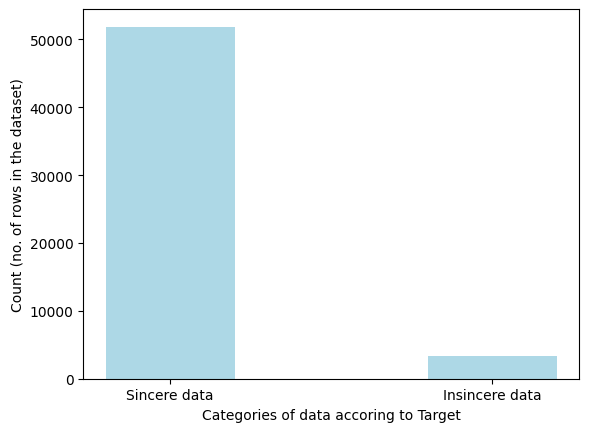

In [ ]:
len_sincere = len(sincere_data)
len_insincere = len(insincere_data)
plt.bar(['Sincere data','Insincere data'], [len_sincere, len_insincere], color ='lightblue', width = 0.4)
plt.xlabel('Categories of data accoring to Target')
plt.ylabel('Count (no. of rows in the dataset)')
plt.show()

**Inference:**
The graph indicates that there may be a class imbalance, with one class (sincere) predominating the dataset, based on which we can infer the imbalanced distribution.

**Graph 2: WordCloud**

Wordcloud is a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency. The more frequent the word in the text, the bigger the word in the cloud.

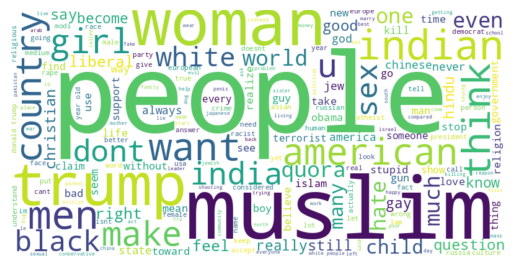

In [ ]:
%matplotlib inline
text = ''.join(insincere_data['ques_lemmatized'])
word_cloud = WordCloud(width=800, height=400, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inference:**
we can deduce the most frequently used words on Quora queries, which are insincere, from the wordcloud above.

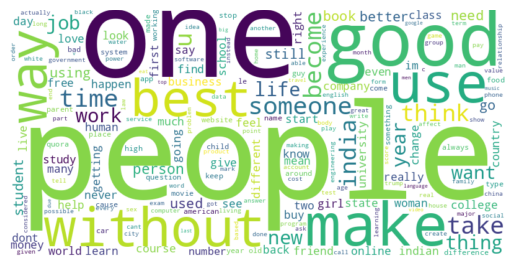

In [ ]:
%matplotlib inline
text = ''.join(sincere_data['ques_lemmatized'])
word_cloud = WordCloud(width=800, height=400, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inference:**
we can deduce the most frequently used words on Quora queries, which are sincere, from the wordcloud above.

**Graph 3: Histogram**

A histogram is a graph that shows the frequency or relative frequency distribution of a quantitative variable.

In [ ]:
import numpy as np

# Remove missing values from 'ques_lemmatized' column
insincere_data = insincere_data.dropna(subset=['ques_lemmatized'])
# Calculating question length for insincere data
insincere_data['insincere_length'] = insincere_data['ques_lemmatized'].str.len()

# Remove missing values from 'ques_lemmatized' column
sincere_data = sincere_data.dropna(subset=['ques_lemmatized'])
# Calculating question length for sincere data
sincere_data['sincere_length'] = sincere_data['ques_lemmatized'].str.len()

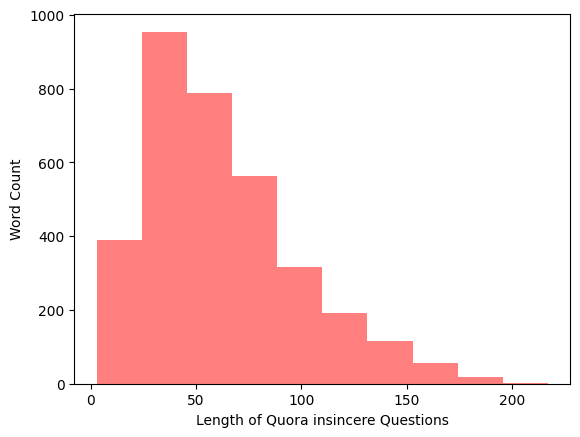

In [ ]:
plt.hist(insincere_data['insincere_length'], color='red', alpha=0.5, label='Insincere')
plt.xlabel('Length of Quora insincere Questions')
plt.ylabel('Word Count')
plt.show()

**Inference:** assess a typical question length in the insincere dataset and recognise any outliers or trends in question length.

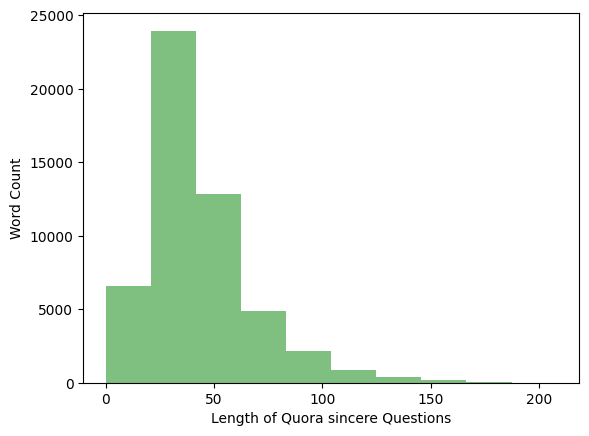

In [ ]:
plt.hist(sincere_data['sincere_length'], color='green', alpha=0.5, label='Sincere')
plt.xlabel('Length of Quora sincere Questions')
plt.ylabel('Word Count')
plt.show()

**Inference:** assess a typical question length in the sincere dataset and recognise any outliers or trends in question length.

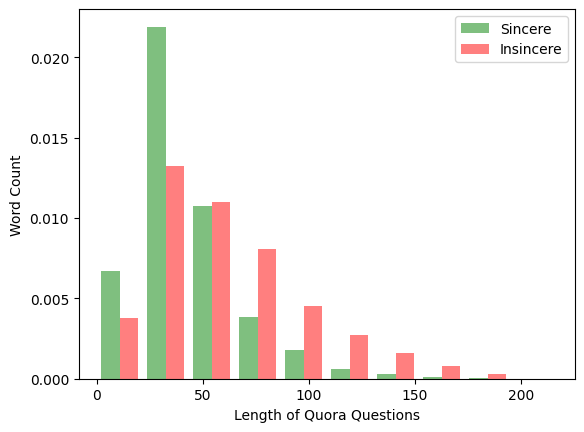

In [ ]:
plt.hist([sincere_data['sincere_length'],insincere_data['insincere_length']], color=['green','red'], alpha=0.5, label=['Sincere','Insincere'], density=True)
plt.xlabel('Length of Quora Questions')
plt.ylabel('Word Count')
plt.legend()
plt.show()

**Inference:** compared typical question lengths across the datasets for sincerity and sincerity, to identify any outliers or patterns.
*The density value set as true which represents the probability distribution*